In [ ]:
import pandas as pd
import numpy as np
import random
pd.set_option('display.max_colwidth', None)
import re

# Импорт датафреймов

### Резюме ГородРабот.ру (df_1)

In [ ]:
df_1=pd.read_csv('/content/gorodrabot.ru-resumes.csv', sep='\t')
print(df_1.shape)
df_1.insert(0, 'Источник', 'ГородРабот.ру')
df_1.rename(columns={'town': 'местоположение'}, inplace=True)
df_1.rename(columns={'name': 'должность'}, inplace=True)
df_1.rename(columns={'date': 'дата_публикации/обновления'}, inplace=True)
df_1.rename(columns={'salary': 'зарплата'}, inplace=True)
df_1.rename(columns={'birthdate': 'дата рождения'}, inplace=True)
df_1.rename(columns={'gender': 'пол'}, inplace=True)
df_1.rename(columns={'experience': 'опыт_работы'}, inplace=True)
df_1.rename(columns={'type': 'тип_занятости'}, inplace=True)
df_1.drop(columns=['source'], axis=1, inplace=True)
df_1.drop(columns=['citizenship'], axis=1, inplace=True)
df_1.rename(columns={'languages': 'иностранные_языки'}, inplace=True)
df_1.rename(columns={'relocation': 'готовность_к_переезду'}, inplace=True)
df_1.rename(columns={'skills': 'профессиональные_навыки'}, inplace=True)
df_1.rename(columns={'about': 'дополнительные_навыки'}, inplace=True)
df_1.head()

(2731, 22)


Источник       id   местоположение  \
0  ГородРабот.ру  5338410           Москва   
1  ГородРабот.ру  5348625           Москва   
2  ГородРабот.ру  5231495  Санкт-Петербург   
3  ГородРабот.ру  5310489          Иркутск   
4  ГородРабот.ру      862        Хабаровск   

                                                                                      должность  \
0                                                                               Аналитик данных   
1                                                                               Аналитик данных   
2                                                                      Аналитик/дата-сайентист;   
3                                                                                Химик-аналитик   
4  Маркетолог-аналитик. Директолог. СЕО- специалист. Специалист по рекламе. Тренер по продажам.   

  дата_публикации/обновления  зарплата                                   url  \
0        2022-10-08 18:58:00       NaN  https://gorodrabot.ru/resume/5338410   
1        2023-03-07 10:09:00   70000.0  https://gorodrabot.ru/resume/5348625   
2        2019-12-11 13:05:00  100000.0  https://gorodrabot.ru/resume/5231495   
3        2022-01-11 11:55:00   40000.0  https://gorodrabot.ru/resume/5310489   
4        2015-04-07 06:28:00   35000.0      https://gorodrabot.ru/resume/862   

                                         notes дата рождения   age  ...  \
0  Резюме проверено модераторами ГородРабот.ру    1992-08-26  31.0  ...   
1  Резюме проверено модераторами ГородРабот.ру    1961-04-04  62.0  ...   
2  Резюме проверено модераторами ГородРабот.ру    1979-04-03  44.0  ...   
3  Резюме проверено модераторами ГородРабот.ру    1999-05-11  24.0  ...   
4  Резюме проверено модераторами ГородРабот.ру    1984-10-28  38.0  ...   

         опыт_работы              education  \
0     6 лет 2 месяца  Высшее (магистратура)   
1   38 лет 6 месяцев   Высшее (специалитет)   
2   18 лет 5 месяцев                 Высшее   
3                NaN   Высшее (бакалавриат)   
4  2 года 11 месяцев                 Высшее   

                                                               тип_занятости  \
0                                                           Удаленная работа   
1                    Полная занятость, Частичная занятость, Удаленная работа   
2                                                           Полная занятость   
3  Полная занятость, Частичная занятость, Временная работа, Удаленная работа   
4                                                           Полная занятость   

                                                                                                                                                                                                                                                                                                              areas  \
0                                                                                                                                                                                                                                                                                                               NaN   
1  [{'area': 'Безопасность:', 'skills': ['Системы видеонаблюдения']}, {'area': 'Высший менеджмент:', 'skills': ['Управление закупками', 'Продажи', 'Информационные технологии, Интернет, Мультимедиа']}, {'area': 'Продажи:', 'skills': ['Управление продажами', 'Электротехническое оборудование, Светотехника']}]   
2                                                                                                                                                                                                                                                                                                               NaN   
3                                                                                                                                                                                                   

### Резюме JobLab (df_2)

In [ ]:
df_2=pd.read_csv('/content/joblab2(резюме).csv')
df_2.insert(0, 'Источник', 'JobLab')
df_2.rename(columns={'место_проживания': 'местоположение'}, inplace=True)
df_2.rename(columns={'желаемая_зарплата': 'зарплата'}, inplace=True)
print(df_2.shape)
df_2.head()

(1110, 13)


Источник  \
0   JobLab   
1   JobLab   
2   JobLab   
3   JobLab   
4   JobLab   

                                                                                              должность  \
0  Руководитель проекта, Инженер проекта, Исполнительный директор / Project manager, Executive director   
1                                                                                       Project Manager   
2                              Product Manager, Менеджер по продукту/Project Manager, Менеджер проектов   
3                                                   Проектный менеджер (стажер)/ Junior project manager   
4                                                                                       Project manager   

  местоположение   возраст         зарплата                  опыт_работы  \
0      Тушинская    41 год    от 1 000 руб.           Опыт работы 17 лет   
1         Мытищи    41 год  от 150 000 руб.  Опыт работы 5 лет 8 месяцев   
2      Технопарк   34 года  от 180 000 руб.  Опыт работы 9 лет 9 месяцев   
3     Новокосино   23 года       договорная           Опыт работы 2 года   
4   Полежаевская    28 лет  от 120 000 руб.  Опыт работы 6 лет 8 месяцев   

                                                                                                                                                                                         место_работы  \
0  01.2022 - 10.2023 – Ведущий асессор 1 категории в группе продвинутых асессоров обработки гео-данных 04.2021 - 09.2021 – Менеджер проекта 08.2016 - 02.2021 – Исполнительный / Генеральный директор   
1                                                                   08.2022 - 10.2023 – Администратор IT проекта 06.2019 - 08.2022 – Специалист по закупкам 09.2020 - 12.2020 – Коммерческий директор   
2   01.2023 - 10.2023 – Главный эксперт 05.2021 - 08.2022 – Bulk Product Manager. Продакт менеджер по жидким продуктам 05.2018 - 05.2021 – Ведущий специалист дирекции по продажам попутной продукции   
3                                                                             08.2022 - 02.2023 – Менеджер проекта 11.2020 - 03.2022 – Регистратор клинико-диагностической лаборатории (преаналитика)   
4                                                          11.2019 - 06.2022 – Помощник генерального директора 09.2018 - 02.2019 – Project manager 10.2016 - 01.2018 – Менеджер по работе с клиентами   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### Резюме SuperJob (df_3) DS

In [ ]:
df_3=pd.read_csv('/content/superjob_resume_ds.csv')
df_3.insert(0, 'Источник', 'SuperJob')
df_3.rename(columns={'Должность': 'должность'}, inplace=True)
df_3.rename(columns={'Зарплата': 'зарплата'}, inplace=True)
df_3.rename(columns={'Местоположение': 'местоположение'}, inplace=True)
df_3.rename(columns={'Тип занятости': 'тип_занятости'}, inplace=True)
df_3.rename(columns={'Возраст': 'возраст'}, inplace=True)

df_3.rename(columns={'Опыт работы': 'опыт_работы'}, inplace=True)
df_3.rename(columns={'Образование': 'образование'}, inplace=True)
df_3.rename(columns={'Профессиональные навыки': 'профессиональные_навыки'}, inplace=True)
df_3.rename(columns={'Дополнительные сведения': 'дополнительные_навыки'}, inplace=True)
df_3.rename(columns={'Иностранные языки': 'иностранные_языки'}, inplace=True)
df_3.rename(columns={'Пол': 'пол'}, inplace=True)
df_3.rename(columns={'Готовность к командировкам': 'готовность_к_командировкам'}, inplace=True)
df_3.rename(columns={'Готовность к переезду': 'готовность_к_переезду'}, inplace=True)
print(df_3.shape)
np.random.seed(42)
df_3.sample(5)

(1812, 14)


,Источник,должность,зарплата,местоположение,тип_занятости,возраст,опыт_работы,образование,профессиональные_навыки,дополнительные_навыки,иностранные_языки,пол,готовность_к_командировкам,готовность_к_переезду
1605,SuperJob,Full-Stack Developer,По договорённости,"Екатеринбург, удаленная, работа, Москва",неполный рабочий день,33 года (родился 07 апреля 1990),8 лет и 2 месяца,"Специальность: Организационные управленческие информационные системы, 2013, Бакалавр, Специальность: Инженерия программного обеспечения, Факультет: Факультет информационно-математических технологий и экономического моделирования, Факультет: Высшая школа экономики и менеджмента, Магистр, 2011",Нет данных,"Профессиональные навыки:Git, Python, ООП, Linux, Keras, computer vision, Deep Learning, OpenCV, C++Дополнительные сведения:Люблю челленджи и работу в команде. Мне нравится проводить эксперименты (с обучением нейронных сетей, с алгоритмами компьютерного зрения и с различными камерами на платформе Raspberry Pi), ставить гипотезы и писать техническую документацию и отчеты. Люблю выполнять работу качественно и в срок. Предпочитаю проводить свободное время за изучением новых технологий, получением новых знаний и чтением книг. Участвовал в организации группы AI/Machine Learning Tieto Brno Group в компании Tieto в Брно, активно посещаю встречи сообщества Machine Learning Meetup Brno (MLMU), участник сообщества Open Data Science. Кроме того участвую в соревнованиях на Kaggle, веду профильный блог на Medium и Habr и активно слежу за мероприятиями ML Тренировки от ODS. Профиль на Github: https://github.com/vovaekb Профиль на Medium: https://medium.com/@vovaprivalov Профиль на Habr: https://habr.com/ru/users/vovaekb90/",Английский язык — разговорный,мужчина,не готов к командировкам,готов к переезду
707,SuperJob,Data Scientist,60 000 ₽,"Москва, удаленная, работа",неполный рабочий день,22 года (родился 03 октября 2001),нет данных,нет данных,Нет данных,"Профессиональные навыки:- Python (Pandas, Numpy, Scikit-learn, Sklearn, Matplotlib, PyTorch, Keras и тд) - MySQL - Математическая статистика и теория вероятности - Git, GitLab - Понимание основных методов и алгоритмов Machine Learning - Знание принципов работы нейросетевых моделей для обработки текста и изображений - Полносвязные нейронные сети - Сверточные сети - Классический MLВакцинация от COVID-19Вакцинирован(а). Есть сертификат",Английский язык — технический,мужчина,не готов к командировкам,нет информации
1791,SuperJob,Программист Python,По договорённости,Москва,не указано,31 год (родился 10 февраля 1992),8 месяцев,нет данных,Нет данных,"Профессиональные навыки:Python\Django программист. Обучаемый, исполнительный, без вредных привычек. Имею опыт разработки небольших личных проектов на Django (блог, имиджборд), а также интересуюсь Data Science и неплохо знаю некоторые смежные библиотеки (Pandas, Matplot, Numpy)",Нет данных,мужчина,не готов к командировкам,нет информации
1631,SuperJob,"Web-программист, Web-разработчик",70 000 ₽,Москва,полная занятость,24 года (родился 17 июня 1999),5 лет и 8 месяцев,"2021, Факультет: Electrical Engineering, Специальность: Mathematics. Computer Sciences, Бакалавр",Нет данных,"Профессиональные навыки:C++, JavaScript, Git, Python, PostgreSQL, SQL, MySQL, Linux, PHP, SVN, Управление проектами, Node.jsДополнительные сведения:Coding skills, Blockchain, Node.js, Back End, Ethereum, Python Programming, Bash Shell, Java, JavaScript, Personal Home Page, Web Applications, Microsoft.NET Technology, D3.js, TensorFlow, MySQL, Algorithms, C++, Applied Programming, Artificial Intelligence, Bootstrap, C Programming Language, Cloud Computing, Django, Git, Jupyter, Machine Learning, Object Oriented Analysis/Design, PyCharm, System Programming, UNIX, Ubuntu",Английский язык — cвободное владение,мужчина,не готов к командировкам,готов к переезду
916,SuperJob,Data Scientist,100 000 ₽,"Москва, удаленная, работа",Нет данных,26 лет (родился 22 января 1997),2 года и 8 месяцев,"2020, Специальность: Прикладная матем

In [ ]:
def separator(row):
    professional_skills = row['профессиональные_навыки']
    additional_skills = row['дополнительные_навыки']

    if professional_skills.lower() == 'нет данных':
        start = additional_skills.find("Профессиональные навыки:") + len("Профессиональные навыки:")
        end = additional_skills.find("Дополнительные сведения:")

        if end != -1:
            professional_skills = additional_skills[start:end].strip()
        else:
            professional_skills = additional_skills[start:].strip()

        additional_skills = additional_skills.replace(additional_skills[start:end], '').strip()
        additional_skills = additional_skills.replace("Профессиональные навыки:", '', 1).strip()

    return professional_skills, additional_skills


df_3['профессиональные_навыки'], df_3['дополнительные_навыки'] = zip(*df_3.apply(separator, axis=1))
df_3['дополнительные_навыки'] = df_3['дополнительные_навыки'].str.strip()

np.random.seed(42)
df_3.sample(5)

,Источник,должность,зарплата,местоположение,тип_занятости,возраст,опыт_работы,образование,профессиональные_навыки,дополнительные_навыки,иностранные_языки,пол,готовность_к_командировкам,готовность_к_переезду
1605,SuperJob,Full-Stack Developer,По договорённости,"Екатеринбург, удаленная, работа, Москва",неполный рабочий день,33 года (родился 07 апреля 1990),8 лет и 2 месяца,"Специальность: Организационные управленческие информационные системы, 2013, Бакалавр, Специальность: Инженерия программного обеспечения, Факультет: Факультет информационно-математических технологий и экономического моделирования, Факультет: Высшая школа экономики и менеджмента, Магистр, 2011","Git, Python, ООП, Linux, Keras, computer vision, Deep Learning, OpenCV, C++","Дополнительные сведения:Люблю челленджи и работу в команде. Мне нравится проводить эксперименты (с обучением нейронных сетей, с алгоритмами компьютерного зрения и с различными камерами на платформе Raspberry Pi), ставить гипотезы и писать техническую документацию и отчеты. Люблю выполнять работу качественно и в срок. Предпочитаю проводить свободное время за изучением новых технологий, получением новых знаний и чтением книг. Участвовал в организации группы AI/Machine Learning Tieto Brno Group в компании Tieto в Брно, активно посещаю встречи сообщества Machine Learning Meetup Brno (MLMU), участник сообщества Open Data Science. Кроме того участвую в соревнованиях на Kaggle, веду профильный блог на Medium и Habr и активно слежу за мероприятиями ML Тренировки от ODS. Профиль на Github: https://github.com/vovaekb Профиль на Medium: https://medium.com/@vovaprivalov Профиль на Habr: https://habr.com/ru/users/vovaekb90/",Английский язык — разговорный,мужчина,не готов к командировкам,готов к переезду
707,SuperJob,Data Scientist,60 000 ₽,"Москва, удаленная, работа",неполный рабочий день,22 года (родился 03 октября 2001),нет данных,нет данных,"- Python (Pandas, Numpy, Scikit-learn, Sklearn, Matplotlib, PyTorch, Keras и тд) - MySQL - Математическая статистика и теория вероятности - Git, GitLab - Понимание основных методов и алгоритмов Machine Learning - Знание принципов работы нейросетевых моделей для обработки текста и изображений - Полносвязные нейронные сети - Сверточные сети - Классический MLВакцинация от COVID-19Вакцинирован(а). Есть сертификат",т,Английский язык — технический,мужчина,не готов к командировкам,нет информации
1791,SuperJob,Программист Python,По договорённости,Москва,не указано,31 год (родился 10 февраля 1992),8 месяцев,нет данных,"Python\Django программист. Обучаемый, исполнительный, без вредных привычек. Имею опыт разработки небольших личных проектов на Django (блог, имиджборд), а также интересуюсь Data Science и неплохо знаю некоторые смежные библиотеки (Pandas, Matplot, Numpy)",),Нет данных,мужчина,не готов к командировкам,нет информации
1631,SuperJob,"Web-программист, Web-разработчик",70 000 ₽,Москва,полная занятость,24 года (родился 17 июня 1999),5 лет и 8 месяцев,"2021, Факультет: Electrical Engineering, Специальность: Mathematics. Computer Sciences, Бакалавр","C++, JavaScript, Git, Python, PostgreSQL, SQL, MySQL, Linux, PHP, SVN, Управление проектами, Node.js","Дополнительные сведения:Coding skills, Blockchain, Node.js, Back End, Ethereum, Python Programming, Bash Shell, Java, JavaScript, Personal Home Page, Web Applications, Microsoft.NET Technology, D3.js, TensorFlow, MySQL, Algorithms, C++, Applied Programming, Artificial Intelligence, Bootstrap, C Programming Language, Cloud Computing, Django, Git, Jupyter, Machine Learning, Object Oriented Analysis/Design, PyCharm, System Programming, UNIX, Ubuntu",Английский язык — cвободное владение,мужчина,не готов к командировкам,готов к переезду
916,SuperJob,Data Scientist,100 000 ₽,"Москва, удаленная, работа",Нет данных,26 лет (родился 22 января 1997),2 года и 8 месяцев,"2020, Специальность: Прикладная математика и информатика, Факультет: ИУ-9, Бакалавр","Python, C++, Keras, TensorFlow, OpenCV, Scikit-learn, Numpy, OCR, object detectio

### Резюме SuperJob (df_4) DA

In [ ]:
df_4=pd.read_csv('/content/resums_superjob_analytics.csv')
df_4.insert(0, 'Источник', 'SuperJob')
df_4.rename(columns={'Должность': 'должность'}, inplace=True)
df_4.rename(columns={'Зарплата': 'зарплата'}, inplace=True)
df_4.rename(columns={'Местоположение': 'местоположение'}, inplace=True)
df_4.rename(columns={'Тип занятости': 'тип_занятости'}, inplace=True)
df_4.rename(columns={'Возраст': 'возраст'}, inplace=True)

df_4.rename(columns={'Опыт работы': 'опыт_работы'}, inplace=True)
df_4.rename(columns={'Последнее место работы': 'последнее_место_работы'}, inplace=True)
df_4.rename(columns={'Образование': 'образование'}, inplace=True)
df_4.rename(columns={'Профессиональные навыки': 'профессиональные_навыки'}, inplace=True)
df_4.rename(columns={'Дополнительные сведения': 'дополнительные_навыки'}, inplace=True)
df_4.rename(columns={'Иностранные языки': 'иностранные_языки'}, inplace=True)
df_4.rename(columns={'Пол': 'пол'}, inplace=True)
df_4.rename(columns={'Последнее место работы	': 'последнее_место_работы'}, inplace=True)
df_4.rename(columns={'Ссылки_проекты': 'ссылки_проекты'}, inplace=True)
df_4.rename(columns={'Дополнительные сведения:_Обо мне': 'дополнительные_сведения:_обо_мне'}, inplace=True)
df_4.rename(columns={'Профессиональные навыки:_Обо мне': 'профессиональные_навыки:_обо_мне'}, inplace=True)
print(df_4.shape)
df_4.head(10)

(5024, 15)


,Источник,должность,зарплата,местоположение,тип_занятости,возраст,пол,опыт_работы,последнее_место_работы,ссылки_проекты,образование,профессиональные_навыки,дополнительные_сведения:_обо_мне,иностранные_языки,профессиональные_навыки:_обо_мне
0,SuperJob,"Руководитель, ведущий специалист информационно-аналитического отдела, политолог, исследователь общественно-политических и социально-экономических процессов, специалист в сфере управления проектами",По договорённости,Новомосковск,не указано,53,М,23 года и 6 месяцев,"Исследователь общественно-политических и социально-экономических процессов Независимый аналитик на удаленном режиме, Новомосковск (Тульская область)",Нет данных,Кандидат наук,Нет данных,"<span class=""_2BpzE _1W4TG _1BJoX inakc _2EuTH _30f1O"">Моя колонка в Центре политического анализа: <a href=""https://centerforpoliticsanalysis.ru/experts/view/id/250"" rel=""nofollow"" target=""_self"">https://centerforpoliticsanalysis.ru/experts/view/id/250</a>\n\nМоя Дзен-визитка: <a href=""https://dzen.ru/a/Y-6YuNq05yNPz7gi"" rel=""nofollow"" target=""_self"">https://dzen.ru/a/Y-6YuNq05yNPz7gi</a>\n\nТелеграм-каналы, ссылки-приглашения:\nПОЛИТлента: <a href=""https://t.me/U1zqLHndIzS56xZ8"" rel=""nofollow"" target=""_self"">https://t.me/U1zqLHndIzS56xZ8</a>\nЭКОлента: <a href=""https://t.me/SXRlqfgN2ySKgT"" rel=""nofollow"" target=""_self"">https://t.me/SXRlqfgN2ySKgT</a>\nКИБЕРлента: <a href=""https://t.me/QjVYOX0_dX0yMjYy"" rel=""nofollow"" target=""_self"">https://t.me/QjVYOX0_dX0yMjYy</a></span>",Английский язык — базовый,NaN
1,SuperJob,Нет данных,Нет данных,Нет данных,Нет данных,Нет данных,Нет данных,Нет данных,Нет данных,Нет данных,Нет данных,Нет данных,NaN,Нет данных,NaN
2,SuperJob,Системный аналитик,По договорённости,Москва,полная занятость,Нет данных,Ж,23 года и 9 месяцев,"Администратор сайта, системный администратор ООО ""СпецЭнергоСистемы"", Москва",Нет данных,Среднее специальное образование,"Работа с большим объемом информации, Аналитический склад ума, Составление спецификаций, eEPC, Системный анализ, Разработка технических заданий, Моделирование бизнес-процессов (IDEF, BPMN, UML), Figma,, SQL и администрирование баз данных, Маркетинговый анализ",NaN,Английский язык — технический,NaN
3,SuperJob,Аналитик данных,80 000 ₽,Москва,полная занятость,69,М,50 лет и 1 месяц,"Инженер 1 категории АО «РАДИЙ ТН» , Москва",Нет данных,Высшее образование,Нет данных,NaN,Английский язык — технический,"<span class=""_2BpzE _1W4TG _1BJoX inakc _2EuTH _30f1O"">Владею профессиональными навыками:\n\nПланирования, административного управления, организации работы коллектива (от 10 до 250 чел. в качестве проректора СВФУ – 17 000 чел.); подбора кадров и их обучения; алгоритмизацией процессов управления.\nРуководства проектами в области автоматизации и телекоммуникаций; разработки бизнес-планов в области телекоммуникаций и информационных технологий.\nРазвертывания компаний в области информационных технологий и производства аэросъемочных работ по территориально-протяженным объектам электрических сетей.\nОрганизации эксплуатации и применения технических средств и комплексов программного обеспечения (АСУ, PC, LAN, WAN, TV, САПР AutoCAD);\nОрганизации разработки и эксплуатации территориальных мониторинговых информационных систем на основе спутниковых данных, данных аэросъемки, GPS, метеорологических систем и других источников, в том числе с использованием геоинформационных технологий.\nСбора и аналитической обработки информации с квалификацией аналитика данных, имею учебную практику анализа данных и машинного обучения в сфере анализа больших данных\nРаботы на ПК (WINDOWS, WORD, EXEL, ACCESS, MS PROJECT, INTERNET, графические средства AutoCAD, ГИС-пакеты и др.);\nВождения автомобиля (права категории «В», практический стаж 30 лет).\n\nЛичные качества\n\nУмение работать в команде, коммуникабельность, уравновешенность, профессионализм, творческий подход и упорство в достижении цели.</span>"
4,SuperJob,Аналитик,По договорённости,Москва,полная занятость,43,

In [ ]:
df_4['ссылки_проекты'].unique()

array(['Нет данных',
       "['https://github.com/DataTalksClub/mlops-zoomcamp/tree/main']",
       "['https://github.com/rozhkov1922']",
       "['https://github.com/SuldinTS']",
       "['https://github.com/EmpyEmpt/']",
       "['https://github.com/hildar']"], dtype=object)

### Резюме RemoteJob (df_5)

In [ ]:
df_5=pd.read_csv('/content/RJ_3126_new_final_6.csv')
df_5.insert(0, 'Источник', 'RemoteJob')
df_5.rename(columns={'Title': 'должность'}, inplace=True)
df_5.rename(columns={'Зарплата': 'зарплата'}, inplace=True)
df_5.rename(columns={'Resume Link': 'url'}, inplace=True)
df_5.rename(columns={'Местоположение': 'местоположение'}, inplace=True)
df_5.drop('Название', axis=1, inplace=True)

print(df_5.shape)
df_5.head()

(3123, 7)


Источник  \
0  RemoteJob   
1  RemoteJob   
2  RemoteJob   
3  RemoteJob   
4  RemoteJob   

                                                                          должность  \
0                                                                      Data Analyst   
1                                                    Сетевой инженер и безопасность   
2                                                                        Researcher   
3                        Data Analyst / Аналитик данных (SQL, Английский язык - С1)   
4  Аналитик / переводчик (чешский/английский) / технический переводчик (английский)   

                                                                                                                     url  \
0                                                                   https://remote-job.ru/resume/show/75137/data-analyst   
1                                                 https://remote-job.ru/resume/show/70981/setevoj-inzhener-i-bezopasnost   
2                                                                     https://remote-job.ru/resume/show/58070/researcher   
3                           https://remote-job.ru/resume/show/73775/data-analyst-analitik-dannyx-sql-anglijskij-yazyk-s1   
4  https://remote-job.ru/resume/show/46389/analitik-perevodchik-cheshskij-anglijskij-texnicheskij-perevodchik-anglijskij   

  Уровень зарплаты                      местоположение  \
0   от 70 000 руб.                           Казахстан   
1    от 3 000 руб.  Россия, Москва и область (МСК +0ч)   
2  от 120 000 руб.   Россия, Приморский край (МСК +7ч)   
3  от 120 000 руб.                       Другая страна   
4   от 35 000 руб.  Россия, Москва и область (МСК +0ч)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
dataframes = [df_1, df_2, df_3, df_4, df_5]
merged_df = pd.concat(dataframes, axis=0)
print(merged_df.shape)

(13800, 36)


In [ ]:
merged_df.duplicated().sum()

126

In [ ]:
merged_df.drop_duplicates(inplace=True)

In [ ]:
print(merged_df.shape)
merged_df.head(10)

(13674, 36)


,Источник,id,местоположение,должность,дата_публикации/обновления,зарплата,url,notes,дата рождения,age,...,образование,дополнительная_информация,готовность_к_командировкам,последнее_место_работы,ссылки_проекты,дополнительные_сведения:_обо_мне,профессиональные_навыки:_обо_мне,Уровень зарплаты,Резюме,очищенное_резюме
0,ГородРабот.ру,5338410.0,Москва,Аналитик данных,2022-10-08 18:58:00,NaN,https://gorodrabot.ru/resume/5338410,Резюме проверено модераторами ГородРабот.ру,1992-08-26,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ГородРабот.ру,5348625.0,Москва,Аналитик данных,2023-03-07 10:09:00,70000.0,https://gorodrabot.ru/resume/5348625,Резюме проверено модераторами ГородРабот.ру,1961-04-04,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ГородРабот.ру,5231495.0,Санкт-Петербург,Аналитик/дата-сайентист;,2019-12-11 13:05:00,100000.0,https://gorodrabot.ru/resume/5231495,Резюме проверено модераторами ГородРабот.ру,1979-04-03,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ГородРабот.ру,5310489.0,Иркутск,Химик-аналитик,2022-01-11 11:55:00,40000.0,https://gorodrabot.ru/resume/5310489,Резюме проверено модераторами ГородРабот.ру,1999-05-11,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ГородРабот.ру,862.0,Хабаровск,Маркетолог-аналитик. Директолог. СЕО- специалист. Специалист по рекламе. Тренер по продажам.,2015-04-07 06:28:00,35000.0,https://gorodrabot.ru/resume/862,Резюме проверено модераторами ГородРабот.ру,1984-10-28,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ГородРабот.ру,5331812.0,Санкт-Петербург,Аналитик,2022-07-29 11:42:00,NaN,https://gorodrabot.ru/resume/5331812,Резюме проверено модераторами ГородРабот.ру,1981-01-01,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ГородРабот.ру,5329681.0,Удельная,Системный аналитик,2022-07-11 15:56:00,NaN,https://gorodrabot.ru/resume/5329681,Резюме проверено модераторами ГородРабот.ру,1989-05-06,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ГородРабот.ру,5314113.0,Москва,Менеджер аналитик по работе с маркетплейсами,2022-02-26 12:40:00,15000.0,https://gorodrabot.ru/resume/5314113,Резюме проверено модераторами ГородРабот.ру,1980-09-30,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ГородРабот.ру,5333822.0,Москва,"Бизнес аналитик, разработчик дашбордов в PowerBI dashboard developer",2022-08-18 22:41:00,170000.0,https://gorodrabot.ru/resume/5333822,Резюме проверено модераторами ГородРабот.ру,1982-10-07,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ГородРабот.ру,5337223.0,Иваново,"Аналитик, помощник руководителя",2022-09-27 11:46:00,25000.0,https://gorodrabot.ru/resume/5337223,Резюме проверено модераторами ГородРабот.ру,1988-10-05,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df['профессиональные_навыки']

0                                                                                                                                                ['Power BI', 'Tableau', 'SQL', 'Azure']
1       ['Руководство коллективом', 'Ведение переговоров', 'Заключение договоров', 'Анализ продаж', 'Анализ конкурентной среды', 'Пользователь 1:C / CRM', 'MS Office', 'Python', 'SQL']
2                                                                                              ['Математика', 'Программирование (python)', 'Инжинирнг бизнес-процессов', 'Преподавание']
3                                                                                                   ['Химические методы анализа', 'Фармацевтическая химия', 'Информационные технологии']
4                                                                                                                                   ['Производство рекламы Аналитик Исследования рынка']
                                                                           

In [ ]:
merged_df['профессиональные_навыки'] = merged_df['профессиональные_навыки'].apply(
    lambda x: [skill.strip().strip("'").lower() for skill in str(x).split(',')] if isinstance(x, str) else [str(skill).strip().strip("'").lower() for skill in x] if isinstance(x, list) else []
)
skills_list = merged_df['профессиональные_навыки'].explode()
skill_counts = skills_list.value_counts()

In [ ]:
skills_list.head(15)

0                   ['power bi
0                      tableau
0                          sql
0                      azure']
1    ['руководство коллективом
1          ведение переговоров
1         заключение договоров
1                анализ продаж
1    анализ конкурентной среды
1       пользователь 1:c / crm
1                    ms office
1                       python
1                        sql']
2                 ['математика
2    программирование (python)
Name: профессиональные_навыки, dtype: object

In [ ]:
skills_list = skills_list.str.replace(r'[\[\]\'\(\)]', '', regex=True)
skills_list

0                      power bi
0                       tableau
0                           sql
0                         azure
1       руководство коллективом
                 ...           
3118                        NaN
3119                        NaN
3120                        NaN
3121                        NaN
3122                        NaN
Name: профессиональные_навыки, Length: 56003, dtype: object

In [ ]:
cl = skills_list.dropna()
data_filtered = cl[cl != 'нет данных']

In [ ]:
unique_list = list(set(skills_list))
len(unique_list)

10314

In [ ]:
data_filtered = data_filtered.values

## Должности

In [ ]:
merged_df['должность'] = merged_df['должность'].str.lower()

In [ ]:
merged_df['должность'].value_counts().head(50)

аналитик                                1306
аналитик данных                          566
data scientist                           395
тестировщик                              331
веб-дизайнер                             314
менеджер по продукту                     277
системный аналитик                       235
тестировщик по                           168
графический дизайнер                     130
аналитик ресурсов на тему разработки     116
программист                              115
qa engineer                              114
product manager                          113
дизайнер                                 110
junior data scientist                    100
data analyst                              91
стажер-аналитик                           89
бизнес-аналитик                           84
аналитик бизнес-процессов                 77
frontend-разработчик                      67
менеджер                                  63
аналитик баз данных                       52
асессор-ко

## Скиллы

In [ ]:
skill_counts = skills_list.value_counts()
skill_counts[0:50]

нет данных                             3157
python                                 1689
sql                                    1421
ms excel                                824
git                                     724
pandas                                  710
английский язык                         597
numpy                                   555
анализ данных                           527
работа в команде                        498
аналитическое мышление                  485
postgresql                              472
работа с большим объемом информации     456
matplotlib                              453
ms powerpoint                           445
ответственность                         444
ms office                               383
html                                    373
mysql                                   361
css                                     335
обучаемость                             335
javascript                              308
linux                           

In [ ]:
merged_df['профессиональные_навыки']

0                                                                                                                                      [['power bi, tableau, sql, azure']]
1       [['руководство коллективом, ведение переговоров, заключение договоров, анализ продаж, анализ конкурентной среды, пользователь 1:c / crm, ms office, python, sql']]
2                                                                                    [['математика, программирование (python), инжинирнг бизнес-процессов, преподавание']]
3                                                                                       [['химические методы анализа, фармацевтическая химия, информационные технологии']]
4                                                                                                                   [['производство рекламы аналитик исследования рынка']]
                                                                                       ...                                                       

In [ ]:
# Функция для удаления нежелательных символов
def remove_unwanted_chars(skills):
    if isinstance(skills, str):  # Проверка, что значение является строкой
        return re.sub(r'[.,/;8*()()\'\[\]]', '', skills)
    else:
        return skills

# Применить функцию к столбцу 'профессиональные_навыки'
merged_df['профессиональные_навыки'] = merged_df['профессиональные_навыки'].apply(remove_unwanted_chars)

In [ ]:
merged_df['профессиональные_навыки'].explode().value_counts()[200:250]

devtools                          31
целеустремлённость                30
администрирование                 30
['javascript                      30
целеустремленность                29
cjm                               29
программирование                  28
бюджетирование                    28
информационные технологии         28
['php                             28
инициативность                    28
сводные таблицы                   28
jupiter                           28
постановка задач разработчикам    28
google sheets                     28
ms project                        27
линейная алгебра                  27
веб-аналитика                     27
outlook                           27
pycharm                           27
adobe indesign                    27
прогнозирование                   26
adobe after effect                26
регресионное тестирование         26
1с: бухгалтерия                   26
многозадачность                   26
уверенный пользователь пк         26
p

In [ ]:
lit = merged_df[merged_df['должность'] == 'data scientist']
lit['профессиональные_навыки'].explode().value_counts()[1:50]

pandas                       188
sql                          176
numpy                        154
matplotlib                   108
git                          107
machine learning              95
scikit-learn                  93
pytorch                       65
sklearn                       63
английский язык               55
seaborn                       54
linux                         53
математическая статистика     48
postgresql                    43
data analysis                 42
keras                         41
tensorflow                    41
scipy                         40
data science                  38
анализ данных                 37
catboost                      36
ms excel                      32
xgboost                       32
машинное обучение             31
deep learning                 30
mysql                         28
c++                           25
lightgbm                      24
нет данных                    22
docker                        20
opencv    

In [ ]:
import pandas as pd
import numpy as np

def create_random_dataframe(column_values, num_rows):
    data = np.random.randint(0, 4, size=(num_rows, len(column_values)))
    df = pd.DataFrame(data, columns=column_values)
    return df

# Пример использования
column_values = ['sql', 'python', 'pandas']
num_rows = 5
random_df = create_random_dataframe(column_values, num_rows)
display(random_df)


,sql,python,pandas
0,2,1,1
1,2,3,0
2,3,2,0
3,2,2,1
4,0,1,0


In [ ]:
position_counts = merged_df['должность'].value_counts()

N = 25 #Количество вакансий
K = 10 #Количество навыков
top_positions = position_counts.head(N)

positions_skills = {}

for position in top_positions.index:
    skills = []
    for idx, row in merged_df[merged_df['должность'] == position].iterrows():
        skills.extend(row['профессиональные_навыки'])
    positions_skills[position] = skills

for position in top_positions.index:
    print(f"Должность: {position}")
    skills_counts = pd.Series(positions_skills[position]).value_counts()
    top_skills = skills_counts.head(K)
    print(top_skills)
    print("\n")

Должность: аналитик
нет данных                             666
ms excel                               234
sql                                    217
python                                 200
аналитическое мышление                 152
работа с большим объемом информации    142
ms powerpoint                          128
анализ данных                          124
ответственность                        116
ms office                              115
dtype: int64


Должность: аналитик данных
python                                 234
sql                                    225
нет данных                             207
ms excel                               145
анализ данных                          127
pandas                                 119
postgresql                              90
аналитическое мышление                  83
работа с большим объемом информации     76
matplotlib                              76
dtype: int64


Должность: data scientist
python              241
pandas       

In [ ]:
def calculate_importance_data(merged_df, position, num_skills):
    position_df = merged_df[merged_df['должность'] == position]

    importance_data = {}

    for idx, row in position_df.iterrows():
        skills = row['профессиональные_навыки']
        for skill in skills:
            importance_data[skill] = importance_data.get(skill, 0) + 1

    importance_df = pd.Series(importance_data).sort_values(ascending=False)
    top_skills = importance_df.head(num_skills)
    importance_data = pd.Series(top_skills.to_dict())

    return importance_data

In [ ]:
num_skills = 30 # Количество навыков
importance_data = calculate_importance_data(merged_df, "аналитик данных", num_skills)
display(importance_data)

python                                 234
sql                                    225
нет данных                             207
ms excel                               145
анализ данных                          127
pandas                                 119
postgresql                              90
аналитическое мышление                  83
работа с большим объемом информации     76
matplotlib                              76
numpy                                   75
ms powerpoint                           68
английский язык                         67
математическая статистика               65
tableau                                 64
power bi                                58
a/b тесты                               51
seaborn                                 43
статистический анализ                   43
работа с базами данных                  40
работа в команде                        39
ms office                               37
git                                     34
data analys

In [ ]:
def scale_importance(importance_series):
    min_importance = importance_series[importance_series > 0].min()
    max_importance = importance_series.max()

    scaled_importance = (importance_series - min_importance) / (max_importance - min_importance) * 4 + 1

    return scaled_importance

In [ ]:
skill_ratings = scale_importance(importance_data)
skill_ratings

python                                 5.000000
sql                                    4.835616
нет данных                             4.506849
ms excel                               3.374429
анализ данных                          3.045662
pandas                                 2.899543
postgresql                             2.369863
аналитическое мышление                 2.242009
работа с большим объемом информации    2.114155
matplotlib                             2.114155
numpy                                  2.095890
ms powerpoint                          1.968037
английский язык                        1.949772
математическая статистика              1.913242
tableau                                1.894977
power bi                               1.785388
a/b тесты                              1.657534
seaborn                                1.511416
статистический анализ                  1.511416
работа с базами данных                 1.456621
работа в команде                       1

In [ ]:
def create_skill_rating_df(skills, skill_ratings, num_rows):
    data = []

    for skill in skills:
        if skill in skill_ratings.index:
            skill_ratings_list = []
            for _ in range(num_rows):
                skill_rating = round(random.normalvariate(skill_ratings[skill], 0.5), 2)
                skill_ratings_list.append(min(5, max(0, skill_rating)))
            data.append(skill_ratings_list)
        else:
            data.append([0 for _ in range(num_rows)])

    df = pd.DataFrame(data).T
    df.columns = skills
    return df

In [ ]:
# Пример использования функции
skills = ['python', 'sql', 'matplotlib', 'коммуникабельность','ms excel', 'figma', 'postgresql', 'анализ данных'] #навыки
num_rows = 10 # количество строк
skill_rating_df = create_skill_rating_df(skills, skill_ratings, num_rows)
skill_rating_df

,python,sql,matplotlib,коммуникабельность,ms excel,figma,postgresql,анализ данных
0,4.17,4.85,1.17,0.0,2.25,0.0,1.32,2.70
1,4.76,5.00,0.73,0.0,3.12,0.0,1.31,2.44
2,4.41,4.89,0.50,0.0,3.19,0.0,1.63,2.27
3,5.00,4.32,0.91,0.0,3.37,0.0,1.41,1.90
4,4.54,5.00,0.74,0.0,2.90,0.0,1.37,1.69
5,5.00,4.60,1.10,0.0,2.51,0.0,0.87,1.45
6,5.00,4.78,1.89,0.0,2.96,0.0,1.16,2.81
7,4.87,5.00,0.68,0.0,3.16,0.0,1.66,2.40
8,4.92,5.00,1.63,0.0,2.05,0.0,1.07,1.82
9,4.56,5.00,1.28,0.0,2.04,0.0,0.87,2.92


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


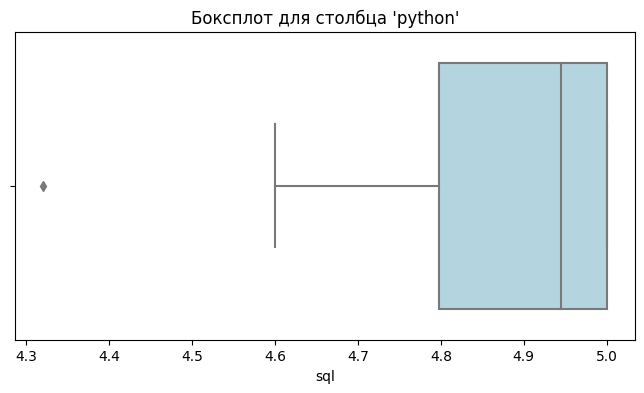

In [ ]:
# Выбор столбца "python" для анализа
data = skill_rating_df['sql']
# Построение боксплота
plt.figure(figsize=(8, 4))
sns.boxplot(x=data, color='lightblue')
plt.title("Боксплот для столбца 'python'")
plt.show()